In [1]:
import pandas_datareader.data as web
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import datetime
import pandas_datareader as web

In [2]:
columns = ["REPORT_DAT", "SHIFT", "OFFENSE", "METHOD", "NEIGHBORHOOD_CLUSTER"]

In [3]:
#Load data
file_path = Path('Crime_Incidents_in_2021 (1).csv')
dc_crime_df = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df = dc_crime_df.loc[:, columns].copy()
dc_crime_df = dc_crime_df.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df = dc_crime_df.dropna()

dc_crime_df

,REPORT_DAT,SHIFT,OFFENSE,METHOD,NEIGHBORHOOD_CLUSTER
0,2021/12/06 05:00:00+00,MIDNIGHT,HOMICIDE,GUN,Cluster 18
1,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Cluster 15
2,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Cluster 33
3,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Cluster 23
4,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Cluster 23
...,...,...,...,...,...
28314,2021/12/23 14:52:28+00,DAY,ASSAULT W/DANGEROUS WEAPON,KNIFE,Cluster 23
28315,2021/12/23 17:49:36+00,DAY,THEFT F/AUTO,OTHERS,Cluster 17
28316,2021/12/23 14:45:24+00,DAY,THEFT/OTHER,OTHERS,Cluster 39
28317,2021/12/23 16:05:37+00,DAY,THEFT/OTHER,OTHERS,Cluster 8


In [4]:
result = dc_crime_df.dtypes
result

REPORT_DAT              object
SHIFT                   object
OFFENSE                 object
METHOD                  object
NEIGHBORHOOD_CLUSTER    object
dtype: object

In [5]:
offense_counts = dc_crime_df.OFFENSE.value_counts()
offense_counts

THEFT/OTHER                   10892
THEFT F/AUTO                   8668
MOTOR VEHICLE THEFT            3477
ROBBERY                        2033
ASSAULT W/DANGEROUS WEAPON     1667
BURGLARY                       1173
HOMICIDE                        224
SEX ABUSE                       181
ARSON                             4
Name: OFFENSE, dtype: int64

In [6]:
method_counts = dc_crime_df.METHOD.value_counts()
method_counts

OTHERS    25471
GUN        2260
KNIFE       588
Name: METHOD, dtype: int64

<AxesSubplot:ylabel='Density'>

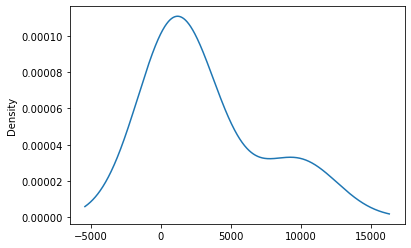

In [7]:
offense_counts.plot.density()

In [8]:
# Determine which values to replace
replace_offenses = list(offense_counts[offense_counts < 1500].index)

# Replace in Dataframe
for offense in replace_offenses:
    dc_crime_df.OFFENSE = dc_crime_df.OFFENSE.replace(offense, "Other")
    
# Check to make sure binning was successful
dc_crime_df.OFFENSE.value_counts()

THEFT/OTHER                   10892
THEFT F/AUTO                   8668
MOTOR VEHICLE THEFT            3477
ROBBERY                        2033
ASSAULT W/DANGEROUS WEAPON     1667
Other                          1582
Name: OFFENSE, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

#Fit the encoder and produce encoded DataFrame
offense_encode_df = pd.DataFrame(enc.fit_transform(dc_crime_df.OFFENSE.values.reshape(-1,1)))

# Rename encoded columns
offense_encode_df.columns = enc.get_feature_names_out(['OFFENSE'])
offense_encode_df

,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
28314,1.0,0.0,0.0,0.0,0.0,0.0
28315,0.0,0.0,0.0,0.0,1.0,0.0
28316,0.0,0.0,0.0,0.0,0.0,1.0
28317,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# Merge the two DataFrames together and drop the OFFENSE column
dc_crime_df.merge(offense_encode_df,left_index=True,right_index=True).drop("OFFENSE", 1)

C:\Users\fredr\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,REPORT_DAT,SHIFT,METHOD,NEIGHBORHOOD_CLUSTER,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,2021/12/06 05:00:00+00,MIDNIGHT,GUN,Cluster 18,0.0,0.0,1.0,0.0,0.0,0.0
1,2021/10/13 21:24:42+00,EVENING,OTHERS,Cluster 15,0.0,0.0,0.0,0.0,1.0,0.0
2,2021/08/04 20:36:50+00,EVENING,OTHERS,Cluster 33,0.0,0.0,0.0,0.0,0.0,1.0
3,2021/09/01 12:39:59+00,DAY,OTHERS,Cluster 23,0.0,0.0,0.0,0.0,0.0,1.0
4,2021/08/12 12:00:17+00,DAY,OTHERS,Cluster 23,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
28314,2021/12/23 14:52:28+00,DAY,KNIFE,Cluster 23,1.0,0.0,0.0,0.0,0.0,0.0
28315,2021/12/23 17:49:36+00,DAY,OTHERS,Cluster 17,0.0,0.0,0.0,0.0,1.0,0.0
28316,2021/12/23 14:45:24+00,DAY,OTHERS,Cluster 39,0.0,0.0,0.0,0.0,0.0,1.0
28317,2021/12/23 16:05:37+00,DAY,OTHERS,Cluster 8,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
dc_crime_df.index = pd.to_datetime(dc_crime_df['REPORT_DAT']) #format='%m/%d/%Y %H:%M:%S')

dc_crime_df

,REPORT_DAT,SHIFT,OFFENSE,METHOD,NEIGHBORHOOD_CLUSTER
REPORT_DAT,,,,,
2021-12-06 05:00:00+00:00,2021/12/06 05:00:00+00,MIDNIGHT,Other,GUN,Cluster 18
2021-10-13 21:24:42+00:00,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Cluster 15
2021-08-04 20:36:50+00:00,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Cluster 33
2021-09-01 12:39:59+00:00,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Cluster 23
2021-08-12 12:00:17+00:00,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Cluster 23
...,...,...,...,...,...
2021-12-23 14:52:28+00:00,2021/12/23 14:52:28+00,DAY,ASSAULT W/DANGEROUS WEAPON,KNIFE,Cluster 23
2021-12-23 17:49:36+00:00,2021/12/23 17:49:36+00,DAY,THEFT F/AUTO,OTHERS,Cluster 17
2021-12-23 14:45:24+00:00,2021/12/23 14:45:24+00,DAY,THEFT/OTHER,OTHERS,Cluster 39


In [13]:
dumvar_crime_df=pd.get_dummies(dc_crime_df, columns=['SHIFT', 'OFFENSE', 'METHOD', 'NEIGHBORHOOD_CLUSTER'])
dumvar_crime_df

,REPORT_DAT,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,...,NEIGHBORHOOD_CLUSTER_Cluster 42,NEIGHBORHOOD_CLUSTER_Cluster 43,NEIGHBORHOOD_CLUSTER_Cluster 44,NEIGHBORHOOD_CLUSTER_Cluster 45,NEIGHBORHOOD_CLUSTER_Cluster 46,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9
REPORT_DAT,,,,,,,,,,,,,,,,,,,,,
2021-12-06 05:00:00+00:00,2021/12/06 05:00:00+00,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-10-13 21:24:42+00:00,2021/10/13 21:24:42+00,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2021-08-04 20:36:50+00:00,2021/08/04 20:36:50+00,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-09-01 12:39:59+00:00,2021/09/01 12:39:59+00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-08-12 12:00:17+00:00,2021/08/12 12:00:17+00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23 14:52:28+00:00,2021/12/23 14:52:28+00,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 17:49:36+00:00,2021/12/23 17:49:36+00,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 14:45:24+00:00,2021/12/23 14:45:24+00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dumvar_crime_df['REPORT_DAT'] = pd.to_datetime(dumvar_crime_df['REPORT_DAT'])
dumvar_crime_df

,REPORT_DAT,SHIFT_DAY,SHIFT_EVENING,SHIFT_MIDNIGHT,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_Other,OFFENSE_ROBBERY,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,...,NEIGHBORHOOD_CLUSTER_Cluster 42,NEIGHBORHOOD_CLUSTER_Cluster 43,NEIGHBORHOOD_CLUSTER_Cluster 44,NEIGHBORHOOD_CLUSTER_Cluster 45,NEIGHBORHOOD_CLUSTER_Cluster 46,NEIGHBORHOOD_CLUSTER_Cluster 5,NEIGHBORHOOD_CLUSTER_Cluster 6,NEIGHBORHOOD_CLUSTER_Cluster 7,NEIGHBORHOOD_CLUSTER_Cluster 8,NEIGHBORHOOD_CLUSTER_Cluster 9
REPORT_DAT,,,,,,,,,,,,,,,,,,,,,
2021-12-06 05:00:00+00:00,2021-12-06 05:00:00+00:00,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-10-13 21:24:42+00:00,2021-10-13 21:24:42+00:00,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2021-08-04 20:36:50+00:00,2021-08-04 20:36:50+00:00,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-09-01 12:39:59+00:00,2021-09-01 12:39:59+00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2021-08-12 12:00:17+00:00,2021-08-12 12:00:17+00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23 14:52:28+00:00,2021-12-23 14:52:28+00:00,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 17:49:36+00:00,2021-12-23 17:49:36+00:00,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2021-12-23 14:45:24+00:00,2021-12-23 14:45:24+00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sns.set()

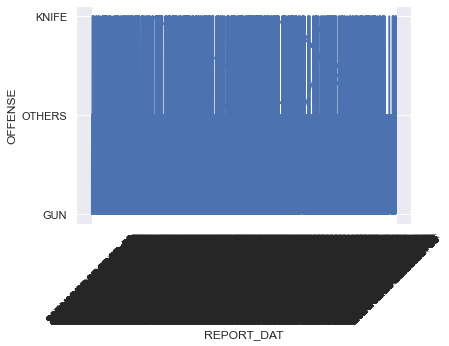

In [18]:
plt.ylabel('OFFENSE')
plt.xlabel('REPORT_DAT')
plt.xticks(rotation=45)
plt.plot(dc_crime_df['REPORT_DAT'], dc_crime_df['METHOD'])